# LAB Monday: Scrape the current top 100 songs and their respective artists, and put the information into a pandas dataframe.

In [1]:
import requests
from bs4 import BeautifulSoup

In [2]:
url='https://www.billboard.com/charts/hot-100/'

In [3]:
results=requests.get(url, headers ={'Accept-Language':'en-US'})

In [4]:
soup = BeautifulSoup(results.content,'html.parser')

In [5]:
soup.select('h3.c-title.a-no-trucate')[0].get_text(strip=True)

"We Don't Talk About Bruno"

In [6]:
soup.select('span.c-label.a-no-trucate')[0].get_text(strip=True)

'Carolina Gaitan, Mauro Castillo, Adassa, Rhenzy Feliz, Diane Guerrero, Stephanie Beatriz & Encanto Cast'

In [7]:
title=[]
artists=[]

len_songs=len(soup.select('h3.c-title.a-no-trucate'))

In [8]:
len_songs

100

In [9]:
for i in range(len_songs):
    title.append(soup.select('h3.c-title.a-no-trucate')[i].get_text(strip=True))
    artists.append(soup.select('span.c-label.a-no-trucate')[i].get_text(strip=True))

In [10]:
# title_df=[]
# artist_df=[]

# for songs in title:
#     title_df.append(songs.replace('\n', ''))

# for songs in artists:
#     artist_df.append(songs.replace('\n', ''))


# using strip=True in the step before it is not necessary to replace \n

In [11]:
len(title)

100

In [12]:
len(artists)

100

In [13]:
import pandas as pd

songs=pd.DataFrame({'Song_title':title, 'Artists':artists})
songs

,Song_title,Artists
0,We Don't Talk About Bruno,"Carolina Gaitan, Mauro Castillo, Adassa, Rhenz..."
1,Heat Waves,Glass Animals
2,abcdefu,GAYLE
3,Easy On Me,Adele
4,Super Gremlin,Kodak Black
...,...,...
95,Closer,Saweetie Featuring H.E.R.
96,Cold December,Rod Wave
97,Get Into It (Yuh),Doja Cat
98,All Too Well (Taylor's Version),Taylor Swift


In [14]:
import numpy as np
songs['Rank']=np.arange(len(songs))+1

In [15]:
songs

,Song_title,Artists,Rank
0,We Don't Talk About Bruno,"Carolina Gaitan, Mauro Castillo, Adassa, Rhenz...",1
1,Heat Waves,Glass Animals,2
2,abcdefu,GAYLE,3
3,Easy On Me,Adele,4
4,Super Gremlin,Kodak Black,5
...,...,...,...
95,Closer,Saweetie Featuring H.E.R.,96
96,Cold December,Rod Wave,97
97,Get Into It (Yuh),Doja Cat,98
98,All Too Well (Taylor's Version),Taylor Swift,99


# LAB Tuesday: Prototype with user input

- collect user input with a prompt eg. 'what song do you like?'


In [16]:
input_song= input('what song do you like? ')

if input_song in songs['Song_title'].values:
    print ('The song exists')
else:
    print('The song does not match, try again')

what song do you like? Closer
The song exists


- deal with at least one possible user input error / behaviour (you can add more issues and resolutions later) eg. standardise upper/lower case
- look for what the user has input, against your 100 hot song collection (more flexible lookup can be added later)
- feedback to user if their song is hot or not. 

In [17]:
input_song= input('what song do you like? ')
lower_song=input_song.lower()

df = songs.applymap(lambda s:s.lower() if type(s) == str else s)

if lower_song in df['Song_title'].values:
    print ('This is a hot song')
else:
    print('This is not a hot song or does not match with the top 100, try again')

what song do you like? closer
This is a hot song


- provide a recommendation from the collection - potentially randomly

In [18]:
from IPython.display import display

lower_song= input('what song do you like?\n\n ').lower()

df = songs.applymap(lambda s:s.lower() if type(s) == str else s)

if lower_song in df['Song_title'].values:
    print ('\nThis is a hot song. But we suggest you these other hot songs: \n')
    print(songs[['Song_title','Artists']].sample(1))
else:
    print('This is not a hot song or does not match with the top 100')
    

what song do you like?

 Closer

This is a hot song. But we suggest you these other hot songs: 

    Song_title   Artists
15  Levitating  Dua Lipa


# LAB Wednesday: API wrappers - Create your collection of songs & audio features

- Instructions

To move forward with the project, you need to create a collection of songs with their audio features - as large as possible!

These are the songs that we will cluster. And, later, when the user inputs a song, we will find the cluster to which the song belongs and recommend a song from the same cluster. The more songs you have, the more accurate and diverse recommendations you'll be able to give. Although... you might want to make sure the collected songs are "curated" in a certain way. Try to find playlists of songs that are diverse, but also that meet certain standards.

The process of sending hundreds or thousands of requests can take some time - it's normal if you have to wait a few minutes (or, if you're ambitious, even hours) to get all the data you need.

An idea for collecting as many songs as possible is to start with all the songs of a big, diverse playlist and then go to every artist present in the playlist and grab every song of every album of that artist. The amount of songs you'll be collecting per playlist will grow exponentially!

In [22]:
import spotipy # install if needed
from spotipy.oauth2 import SpotifyClientCredentials
import getpass

In [23]:
client_id = str(getpass.getpass('client_id?'))
client_secret = str(getpass.getpass('client_secret?'))

client_id?········
client_secret?········


In [24]:
client_credentials_manager = SpotifyClientCredentials(client_id, client_secret)
sp = spotipy.Spotify(client_credentials_manager = client_credentials_manager)

In [25]:
playlist=sp.user_playlist_tracks('PMB Music','69tUdeFaKRDVTg2guSDttx')

In [26]:
playlist.keys()

dict_keys(['href', 'items', 'limit', 'next', 'offset', 'previous', 'total'])

In [27]:
playlist['items'][4]['track']['id']

'7oWqXVRExRlNR0jZJNoO9w'

In [28]:
playlist['total']

1038

In [29]:
len(playlist['items'])

100

In [30]:
# user_id='Bradnumber1'
# playlist_id='1YL4XoegERoragv0RK2RC9'

In [31]:
user_id='PMB Music'
playlist_id='69tUdeFaKRDVTg2guSDttx'

In [32]:
def get_playlist_tracks(user_id,playlist_id):
    results = sp.user_playlist_tracks(user_id,playlist_id)
    tracks = results['items']
    while results['next']:
        results = sp.next(results)
        tracks.extend(results['items'])
    return tracks

In [33]:
full_track_ids=get_playlist_tracks(user_id,playlist_id)

In [34]:
len(full_track_ids)

1038

In [35]:
full_track_ids[0].keys()

dict_keys(['added_at', 'added_by', 'is_local', 'primary_color', 'track', 'video_thumbnail'])

In [36]:
full_track_ids[0]['track'].keys()

dict_keys(['album', 'artists', 'available_markets', 'disc_number', 'duration_ms', 'episode', 'explicit', 'external_ids', 'external_urls', 'href', 'id', 'is_local', 'name', 'popularity', 'preview_url', 'track', 'track_number', 'type', 'uri'])

In [37]:
full_track_ids[0]['track']['name']

'Original Sin'

In [38]:
full_track_ids[0]['track']['artists'][0]['name']

'INXS'

In [39]:
full_track_ids[0]['track']['id']

'7pSzRRMaPXA39wvrnvdmSH'

In [40]:
title=[]
artist=[]
song_id=[]

for i in full_track_ids:
    title.append(i['track']['name'])
    artist.append(i['track']['artists'][0]['name'])
    song_id.append(i['track']['id'])

In [41]:
playlist_df=pd.DataFrame({'title': title, 'artist': artist, 'song_id': song_id})

In [42]:
playlist_df

,title,artist,song_id
0,Original Sin,INXS,7pSzRRMaPXA39wvrnvdmSH
1,Sussudio,Phil Collins,07zkNvtcmPOFlMOXbma13k
2,Don't You (Forget About Me),Simple Minds,603aPXFY2Ec2WuFganUGuD
3,Everywhere,Fleetwood Mac,6i8ecOsx4J2Px1maiqzqoG
4,High & Dry,ABC,7oWqXVRExRlNR0jZJNoO9w
...,...,...,...
1033,If I Should Fall From Grace With God,The Pogues,2QlYQQ8JpZf8mAk7PWcXsB
1034,The Devil's Right Hand,Steve Earle,59JOneFVktVPSm0agaQWDo
1035,Europe After the Rain,John Foxx,7p1wyDdcnJuwQDodZh1Duq
1036,That's What You Always Say,The Dream Syndicate,7jgfLVXTBxufrbccakHQi1


In [43]:
spaceplaylist=[]
for i in range(len(playlist_df)):
    spaceplaylist.extend(sp.audio_features(tracks=playlist_df['song_id'][i]))

In [44]:
song_features=pd.DataFrame.from_dict(spaceplaylist)

In [45]:
song_features

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
0,0.685,0.633,9,-7.259,1,0.0377,0.01360,0.000106,0.0935,0.731,131.397,audio_features,7pSzRRMaPXA39wvrnvdmSH,spotify:track:7pSzRRMaPXA39wvrnvdmSH,https://api.spotify.com/v1/tracks/7pSzRRMaPXA3...,https://api.spotify.com/v1/audio-analysis/7pSz...,317240,4
1,0.736,0.838,0,-6.932,1,0.0725,0.01540,0.060800,0.0454,0.790,121.242,audio_features,07zkNvtcmPOFlMOXbma13k,spotify:track:07zkNvtcmPOFlMOXbma13k,https://api.spotify.com/v1/tracks/07zkNvtcmPOF...,https://api.spotify.com/v1/audio-analysis/07zk...,264947,4
2,0.663,0.629,2,-12.697,1,0.0260,0.08360,0.039400,0.1050,0.648,111.290,audio_features,603aPXFY2Ec2WuFganUGuD,spotify:track:603aPXFY2Ec2WuFganUGuD,https://api.spotify.com/v1/tracks/603aPXFY2Ec2...,https://api.spotify.com/v1/audio-analysis/603a...,260867,4
3,0.690,0.540,4,-10.516,1,0.0317,0.21800,0.006570,0.1150,0.764,114.846,audio_features,6i8ecOsx4J2Px1maiqzqoG,spotify:track:6i8ecOsx4J2Px1maiqzqoG,https://api.spotify.com/v1/tracks/6i8ecOsx4J2P...,https://api.spotify.com/v1/audio-analysis/6i8e...,222733,4
4,0.571,0.747,4,-7.989,1,0.0267,0.06700,0.000018,0.1010,0.602,95.997,audio_features,7oWqXVRExRlNR0jZJNoO9w,spotify:track:7oWqXVRExRlNR0jZJNoO9w,https://api.spotify.com/v1/tracks/7oWqXVRExRlN...,https://api.spotify.com/v1/audio-analysis/7oWq...,264587,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1033,0.454,0.952,9,-8.938,1,0.0536,0.01500,0.017800,0.1420,0.589,129.678,audio_features,2QlYQQ8JpZf8mAk7PWcXsB,spotify:track:2QlYQQ8JpZf8mAk7PWcXsB,https://api.spotify.com/v1/tracks/2QlYQQ8JpZf8...,https://api.spotify.com/v1/audio-analysis/2QlY...,140693,4
1034,0.560,0.702,11,-9.810,1,0.0419,0.06250,0.000000,0.0951,0.848,126.866,audio_features,59JOneFVktVPSm0agaQWDo,spotify:track:59JOneFVktVPSm0agaQWDo,https://api.spotify.com/v1/tracks/59JOneFVktVP...,https://api.spotify.com/v1/audio-analysis/59JO...,181400,4
1035,0.523,0.788,4,-9.512,1,0.0332,0.00774,0.000014,0.2650,0.648,142.393,audio_features,7p1wyDdcnJuwQDodZh1Duq,spotify:track:7p1wyDdcnJuwQDodZh1Duq,https://api.spotify.com/v1/tracks/7p1wyDdcnJuw...,https://api.spotify.com/v1/audio-analysis/7p1w...,240573,4
1036,0.614,0.918,9,-7.129,0,0.0600,0.05220,0.085000,0.0840,0.734,125.755,audio_features,7jgfLVXTBxufrbccakHQi1,spotify:track:7jgfLVXTBxufrbccakHQi1,https://api.spotify.com/v1/tracks/7jgfLVXTBxuf...,https://api.spotify.com/v1/audio-analysis/7jgf...,192973,4


In [46]:
playlist_features = playlist_df.merge(song_features, left_on='song_id', right_on='id')

In [47]:
playlist_features

,title,artist,song_id,danceability,energy,key,loudness,mode,speechiness,acousticness,...,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
0,Original Sin,INXS,7pSzRRMaPXA39wvrnvdmSH,0.685,0.633,9,-7.259,1,0.0377,0.01360,...,0.0935,0.731,131.397,audio_features,7pSzRRMaPXA39wvrnvdmSH,spotify:track:7pSzRRMaPXA39wvrnvdmSH,https://api.spotify.com/v1/tracks/7pSzRRMaPXA3...,https://api.spotify.com/v1/audio-analysis/7pSz...,317240,4
1,Sussudio,Phil Collins,07zkNvtcmPOFlMOXbma13k,0.736,0.838,0,-6.932,1,0.0725,0.01540,...,0.0454,0.790,121.242,audio_features,07zkNvtcmPOFlMOXbma13k,spotify:track:07zkNvtcmPOFlMOXbma13k,https://api.spotify.com/v1/tracks/07zkNvtcmPOF...,https://api.spotify.com/v1/audio-analysis/07zk...,264947,4
2,Don't You (Forget About Me),Simple Minds,603aPXFY2Ec2WuFganUGuD,0.663,0.629,2,-12.697,1,0.0260,0.08360,...,0.1050,0.648,111.290,audio_features,603aPXFY2Ec2WuFganUGuD,spotify:track:603aPXFY2Ec2WuFganUGuD,https://api.spotify.com/v1/tracks/603aPXFY2Ec2...,https://api.spotify.com/v1/audio-analysis/603a...,260867,4
3,Everywhere,Fleetwood Mac,6i8ecOsx4J2Px1maiqzqoG,0.690,0.540,4,-10.516,1,0.0317,0.21800,...,0.1150,0.764,114.846,audio_features,6i8ecOsx4J2Px1maiqzqoG,spotify:track:6i8ecOsx4J2Px1maiqzqoG,https://api.spotify.com/v1/tracks/6i8ecOsx4J2P...,https://api.spotify.com/v1/audio-analysis/6i8e...,222733,4
4,High & Dry,ABC,7oWqXVRExRlNR0jZJNoO9w,0.571,0.747,4,-7.989,1,0.0267,0.06700,...,0.1010,0.602,95.997,audio_features,7oWqXVRExRlNR0jZJNoO9w,spotify:track:7oWqXVRExRlNR0jZJNoO9w,https://api.spotify.com/v1/tracks/7oWqXVRExRlN...,https://api.spotify.com/v1/audio-analysis/7oWq...,264587,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1033,If I Should Fall From Grace With God,The Pogues,2QlYQQ8JpZf8mAk7PWcXsB,0.454,0.952,9,-8.938,1,0.0536,0.01500,...,0.1420,0.589,129.678,audio_features,2QlYQQ8JpZf8mAk7PWcXsB,spotify:track:2QlYQQ8JpZf8mAk7PWcXsB,https://api.spotify.com/v1/tracks/2QlYQQ8JpZf8...,https://api.spotify.com/v1/audio-analysis/2QlY...,140693,4
1034,The Devil's Right Hand,Steve Earle,59JOneFVktVPSm0agaQWDo,0.560,0.702,11,-9.810,1,0.0419,0.06250,...,0.0951,0.848,126.866,audio_features,59JOneFVktVPSm0agaQWDo,spotify:track:59JOneFVktVPSm0agaQWDo,https://api.spotify.com/v1/tracks/59JOneFVktVP...,https://api.spotify.com/v1/audio-analysis/59JO...,181400,4
1035,Europe After the Rain,John Foxx,7p1wyDdcnJuwQDodZh1Duq,0.523,0.788,4,-9.512,1,0.0332,0.00774,...,0.2650,0.648,142.393,audio_features,7p1wyDdcnJuwQDodZh1Duq,spotify:track:7p1wyDdcnJuwQDodZh1Duq,https://api.spotify.com/v1/tracks/7p1wyDdcnJuw...,https://api.spotify.com/v1/audio-analysis/7p1w...,240573,4
1036,That's What You Always Say,The Dream Syndicate,7jgfLVXTBxufrbccakHQi1,0.614,0.918,9,-7.129,0,0.0600,0.05220,...,0.0840,0.734,125.755,audio_features,7jgfLVXTBxufrbccakHQi1,spotify:track:7jgfLVXTBxufrbccakHQi1,https://api.spotify.com/v1/tracks/7jgfLVXTBxuf...,https://api.spotify.com/v1/audio-analysis/7jgf...,192973,4


In [48]:
playlist_features=playlist_features.drop(['id'],axis=1)

# LAB Thursday: Unsupervised learning intro

Instructions:

It's the moment to perform clustering on the songs you collected. Remember that the ultimate goal of this little project is to improve the recommendations of artists. Clustering the songs will allow the recommendation system to limit the scope of the recommendations to only songs that belong to the same cluster - songs with similar audio features.

The experiments you did with the Spotify API and the Billboard web scraping will allow you to create a pipeline such that when the user enters a song, you:

1- Check whether or not the song is in the Billboard Hot 200.  
2- Collect the audio features from the Spotify API.

After that, you want to send the Spotify audio features of the submitted song to the clustering model, which should return a cluster number.

We want to have as many songs as possible to create the clustering model, so we will add the songs you collected to a bigger dataset available on Kaggle containing 160 thousand songs.

In [51]:
# ingredients
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly
import plotly.graph_objs as go
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
import warnings
warnings.filterwarnings("ignore")

In [52]:
playlist_features.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1038 entries, 0 to 1037
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   title             1038 non-null   object 
 1   artist            1038 non-null   object 
 2   song_id           1038 non-null   object 
 3   danceability      1038 non-null   float64
 4   energy            1038 non-null   float64
 5   key               1038 non-null   int64  
 6   loudness          1038 non-null   float64
 7   mode              1038 non-null   int64  
 8   speechiness       1038 non-null   float64
 9   acousticness      1038 non-null   float64
 10  instrumentalness  1038 non-null   float64
 11  liveness          1038 non-null   float64
 12  valence           1038 non-null   float64
 13  tempo             1038 non-null   float64
 14  type              1038 non-null   object 
 15  uri               1038 non-null   object 
 16  track_href        1038 non-null   object 


In [53]:
playlist_features.describe()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
count,1038.000000,1038.000000,1038.000000,1038.000000,1038.000000,1038.000000,1038.000000,1038.000000,1038.000000,1038.000000,1038.000000,1038.000000,1038.000000
mean,0.632189,0.687339,5.324663,-9.279776,0.699422,0.046270,0.172362,0.051058,0.172441,0.667623,122.082837,256884.836224,3.994220
std,0.133483,0.182735,3.614445,3.338142,0.458730,0.038632,0.190304,0.152257,0.148771,0.227747,23.743666,58412.013047,0.098029
min,0.147000,0.160000,0.000000,-22.597000,0.000000,0.021500,0.000005,0.000000,0.016500,0.050500,56.832000,122760.000000,3.000000
25%,0.546250,0.557250,2.000000,-11.725750,0.000000,0.031100,0.026850,0.000004,0.075875,0.510250,107.996500,221096.500000,4.000000
50%,0.639000,0.711000,5.000000,-8.857000,1.000000,0.037500,0.102500,0.000212,0.114500,0.709500,120.251000,245553.000000,4.000000
75%,0.726750,0.833750,9.000000,-6.687750,1.000000,0.048900,0.254500,0.008310,0.242000,0.857000,132.717000,281169.750000,4.000000
max,0.968000,0.991000,11.000000,-2.658000,1.000000,0.934000,0.941000,0.927000,0.988000,0.985000,205.218000,730800.000000,5.000000


In [54]:
cluster_df=playlist_features.drop(['title','artist','type','uri','track_href','analysis_url'],axis=1)

In [55]:
cluster_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1038 entries, 0 to 1037
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   song_id           1038 non-null   object 
 1   danceability      1038 non-null   float64
 2   energy            1038 non-null   float64
 3   key               1038 non-null   int64  
 4   loudness          1038 non-null   float64
 5   mode              1038 non-null   int64  
 6   speechiness       1038 non-null   float64
 7   acousticness      1038 non-null   float64
 8   instrumentalness  1038 non-null   float64
 9   liveness          1038 non-null   float64
 10  valence           1038 non-null   float64
 11  tempo             1038 non-null   float64
 12  duration_ms       1038 non-null   int64  
 13  time_signature    1038 non-null   int64  
dtypes: float64(9), int64(4), object(1)
memory usage: 121.6+ KB


In [56]:
cluster_df.index=cluster_df.iloc[:,0]

In [57]:
cluster_df

,song_id,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
song_id,,,,,,,,,,,,,,
7pSzRRMaPXA39wvrnvdmSH,7pSzRRMaPXA39wvrnvdmSH,0.685,0.633,9,-7.259,1,0.0377,0.01360,0.000106,0.0935,0.731,131.397,317240,4
07zkNvtcmPOFlMOXbma13k,07zkNvtcmPOFlMOXbma13k,0.736,0.838,0,-6.932,1,0.0725,0.01540,0.060800,0.0454,0.790,121.242,264947,4
603aPXFY2Ec2WuFganUGuD,603aPXFY2Ec2WuFganUGuD,0.663,0.629,2,-12.697,1,0.0260,0.08360,0.039400,0.1050,0.648,111.290,260867,4
6i8ecOsx4J2Px1maiqzqoG,6i8ecOsx4J2Px1maiqzqoG,0.690,0.540,4,-10.516,1,0.0317,0.21800,0.006570,0.1150,0.764,114.846,222733,4
7oWqXVRExRlNR0jZJNoO9w,7oWqXVRExRlNR0jZJNoO9w,0.571,0.747,4,-7.989,1,0.0267,0.06700,0.000018,0.1010,0.602,95.997,264587,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2QlYQQ8JpZf8mAk7PWcXsB,2QlYQQ8JpZf8mAk7PWcXsB,0.454,0.952,9,-8.938,1,0.0536,0.01500,0.017800,0.1420,0.589,129.678,140693,4
59JOneFVktVPSm0agaQWDo,59JOneFVktVPSm0agaQWDo,0.560,0.702,11,-9.810,1,0.0419,0.06250,0.000000,0.0951,0.848,126.866,181400,4
7p1wyDdcnJuwQDodZh1Duq,7p1wyDdcnJuwQDodZh1Duq,0.523,0.788,4,-9.512,1,0.0332,0.00774,0.000014,0.2650,0.648,142.393,240573,4


In [58]:
cluster_df=cluster_df.iloc[:,1:14]
cluster_df

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
song_id,,,,,,,,,,,,,
7pSzRRMaPXA39wvrnvdmSH,0.685,0.633,9,-7.259,1,0.0377,0.01360,0.000106,0.0935,0.731,131.397,317240,4
07zkNvtcmPOFlMOXbma13k,0.736,0.838,0,-6.932,1,0.0725,0.01540,0.060800,0.0454,0.790,121.242,264947,4
603aPXFY2Ec2WuFganUGuD,0.663,0.629,2,-12.697,1,0.0260,0.08360,0.039400,0.1050,0.648,111.290,260867,4
6i8ecOsx4J2Px1maiqzqoG,0.690,0.540,4,-10.516,1,0.0317,0.21800,0.006570,0.1150,0.764,114.846,222733,4
7oWqXVRExRlNR0jZJNoO9w,0.571,0.747,4,-7.989,1,0.0267,0.06700,0.000018,0.1010,0.602,95.997,264587,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2QlYQQ8JpZf8mAk7PWcXsB,0.454,0.952,9,-8.938,1,0.0536,0.01500,0.017800,0.1420,0.589,129.678,140693,4
59JOneFVktVPSm0agaQWDo,0.560,0.702,11,-9.810,1,0.0419,0.06250,0.000000,0.0951,0.848,126.866,181400,4
7p1wyDdcnJuwQDodZh1Duq,0.523,0.788,4,-9.512,1,0.0332,0.00774,0.000014,0.2650,0.648,142.393,240573,4


In [59]:
cluster_df.rename_axis(None, inplace=True)
cluster_df

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
7pSzRRMaPXA39wvrnvdmSH,0.685,0.633,9,-7.259,1,0.0377,0.01360,0.000106,0.0935,0.731,131.397,317240,4
07zkNvtcmPOFlMOXbma13k,0.736,0.838,0,-6.932,1,0.0725,0.01540,0.060800,0.0454,0.790,121.242,264947,4
603aPXFY2Ec2WuFganUGuD,0.663,0.629,2,-12.697,1,0.0260,0.08360,0.039400,0.1050,0.648,111.290,260867,4
6i8ecOsx4J2Px1maiqzqoG,0.690,0.540,4,-10.516,1,0.0317,0.21800,0.006570,0.1150,0.764,114.846,222733,4
7oWqXVRExRlNR0jZJNoO9w,0.571,0.747,4,-7.989,1,0.0267,0.06700,0.000018,0.1010,0.602,95.997,264587,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2QlYQQ8JpZf8mAk7PWcXsB,0.454,0.952,9,-8.938,1,0.0536,0.01500,0.017800,0.1420,0.589,129.678,140693,4
59JOneFVktVPSm0agaQWDo,0.560,0.702,11,-9.810,1,0.0419,0.06250,0.000000,0.0951,0.848,126.866,181400,4
7p1wyDdcnJuwQDodZh1Duq,0.523,0.788,4,-9.512,1,0.0332,0.00774,0.000014,0.2650,0.648,142.393,240573,4
7jgfLVXTBxufrbccakHQi1,0.614,0.918,9,-7.129,0,0.0600,0.05220,0.085000,0.0840,0.734,125.755,192973,4


- Clustering no scaled

In [60]:
K_Means=KMeans(n_clusters=5, random_state=5)
cluster_model_nonscaled=K_Means.fit(cluster_df)
cluster_model_nonscaled.cluster_centers_

array([[ 6.28376923e-01,  6.77034615e-01,  5.43846154e+00,
        -9.43533462e+00,  6.57692308e-01,  4.32034615e-02,
         1.68554947e-01,  3.38214972e-02,  1.79388846e-01,
         6.50321154e-01,  1.23136569e+02,  2.82013142e+05,
         3.99230769e+00],
       [ 5.94318182e-01,  6.54736364e-01,  5.24545455e+00,
        -9.68930909e+00,  6.63636364e-01,  4.92127273e-02,
         1.85671764e-01,  6.26100946e-02,  1.59852727e-01,
         5.85964545e-01,  1.17064145e+02,  3.46200755e+05,
         4.00000000e+00],
       [ 6.39628235e-01,  6.82397647e-01,  5.39058824e+00,
        -9.21416941e+00,  7.15294118e-01,  4.27183529e-02,
         1.71785895e-01,  4.83575610e-02,  1.69781647e-01,
         6.71736706e-01,  1.20841158e+02,  2.37969781e+05,
         3.99764706e+00],
       [ 7.01227273e-01,  6.27681818e-01,  5.36363636e+00,
        -1.06832727e+01,  5.90909091e-01,  5.23500000e-02,
         1.11954164e-01,  1.17604626e-01,  1.51413636e-01,
         6.43272727e-01,  1.13752500e

In [61]:
cluster_model_nonscaled.labels_

array([1, 0, 0, ..., 2, 4, 2])

In [62]:
cluster_df['cluster_no_sc']=cluster_model_nonscaled.labels_

In [63]:
cluster_df['cluster_no_sc'].value_counts()

2    424
0    260
4    222
1    110
3     22
Name: cluster_no_sc, dtype: int64

In [64]:
cluster_df.head(1)

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,cluster_no_sc
7pSzRRMaPXA39wvrnvdmSH,0.685,0.633,9,-7.259,1,0.0377,0.0136,0.000106,0.0935,0.731,131.397,317240,4,1


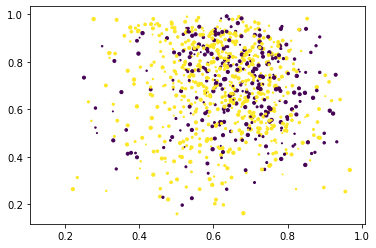

In [65]:
plt.scatter(cluster_df.iloc[:,0], cluster_df.iloc[:,1], cluster_df.iloc[:,2], cluster_df.iloc[:,4]);

In [66]:
cluster_df=cluster_df.drop('cluster_no_sc',axis=1)

In [67]:
#Scaling
cluster_df_copy=cluster_df
cluster_scaled=K_Means.fit(cluster_df_copy)
cluster_df_copy['cluster_sc']=cluster_scaled.labels_

In [68]:
scaler=StandardScaler()
scaler.fit(cluster_df_copy)
scaler.mean_

array([ 6.32188825e-01,  6.87339114e-01,  5.32466281e+00, -9.27977649e+00,
        6.99421965e-01,  4.62703276e-02,  1.72361524e-01,  5.10575821e-02,
        1.72441233e-01,  6.67623025e-01,  1.22082837e+02,  2.56884836e+05,
        3.99421965e+00,  1.84200385e+00])

In [69]:
cluster_scaled=scaler.transform(cluster_df_copy)

In [70]:
cluster_scaled.shape

(1038, 14)

In [71]:
type(cluster_scaled)
cluster_scaled_df=pd.DataFrame(cluster_scaled,columns=['danceability' , 'energy' , 'key' , 'loudness' , 'mode' , 'speechiness' , 'acousticness' , 'instrumentalness' , 'liveness' , 'valence' , 'tempo' , 'duration_ms' , 'time_signature', 'cluster_sc'])
cluster_scaled_df

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,cluster_sc
0,0.395831,-0.297509,1.017337,0.605651,0.655555,-0.221953,-0.834653,-0.334804,-0.530878,0.278412,0.392469,1.033764,0.058994,-0.601489
1,0.778086,0.824874,-1.473872,0.703657,0.655555,0.679293,-0.825190,0.064018,-0.854350,0.537597,-0.035430,0.138089,0.058994,-1.315844
2,0.230936,-0.319409,-0.920270,-1.024184,0.655555,-0.524959,-0.466644,-0.076602,-0.453541,-0.086203,-0.454776,0.068207,0.058994,-1.315844
3,0.433307,-0.806687,-0.366668,-0.370511,0.655555,-0.377341,0.239934,-0.292329,-0.386291,0.423380,-0.304937,-0.584953,0.058994,0.112865
4,-0.458623,0.326646,-0.366668,0.386862,0.655555,-0.506830,-0.553914,-0.335383,-0.480441,-0.288279,-1.099174,0.131923,0.058994,-1.315844
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1033,-1.335562,1.449028,1.017337,0.102435,0.655555,0.189823,-0.827293,-0.218536,-0.204717,-0.345388,0.320036,-1.990136,0.058994,1.541574
1034,-0.541070,0.080269,1.570939,-0.158914,0.655555,-0.113182,-0.577572,-0.335500,-0.520118,0.792388,0.201547,-1.292906,0.058994,1.541574
1035,-0.818393,0.551122,-0.366668,-0.069600,0.655555,-0.338494,-0.865460,-0.335411,0.622456,-0.086203,0.855805,-0.279389,0.058994,0.112865
1036,-0.136329,1.262877,1.017337,0.644614,-1.525426,0.355569,-0.631722,0.223036,-0.594766,0.291591,0.154733,-1.094683,0.058994,1.541574


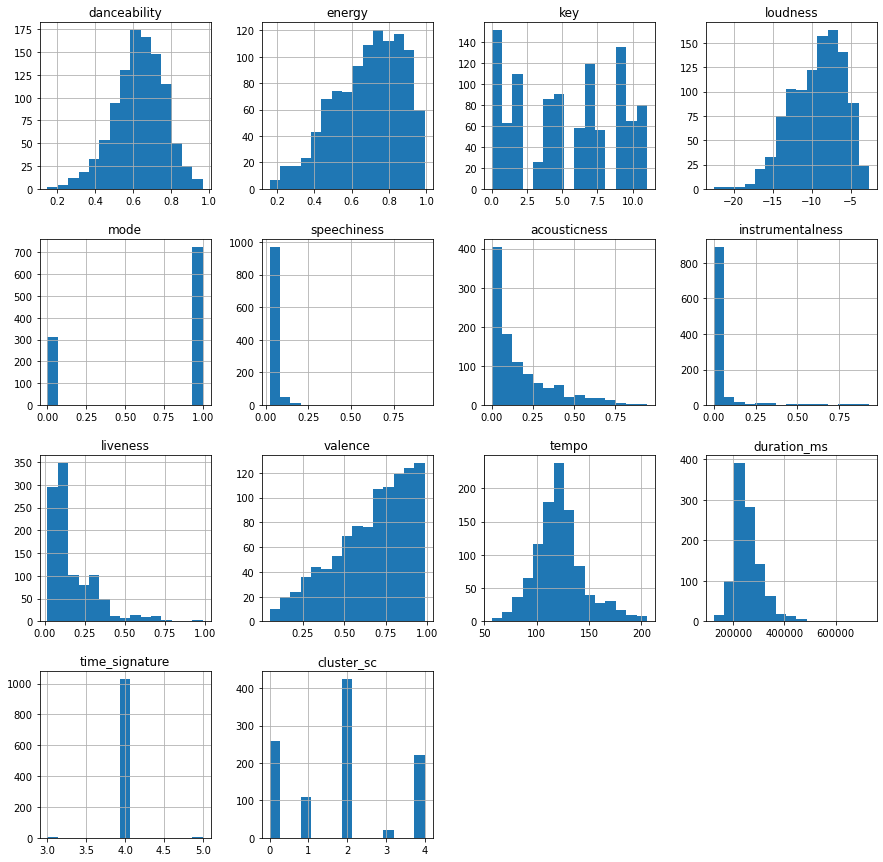

In [72]:
#we compare with the original no scaled checking if more or less has the same pattern
cluster_df.hist(bins=15,figsize=(15,15));

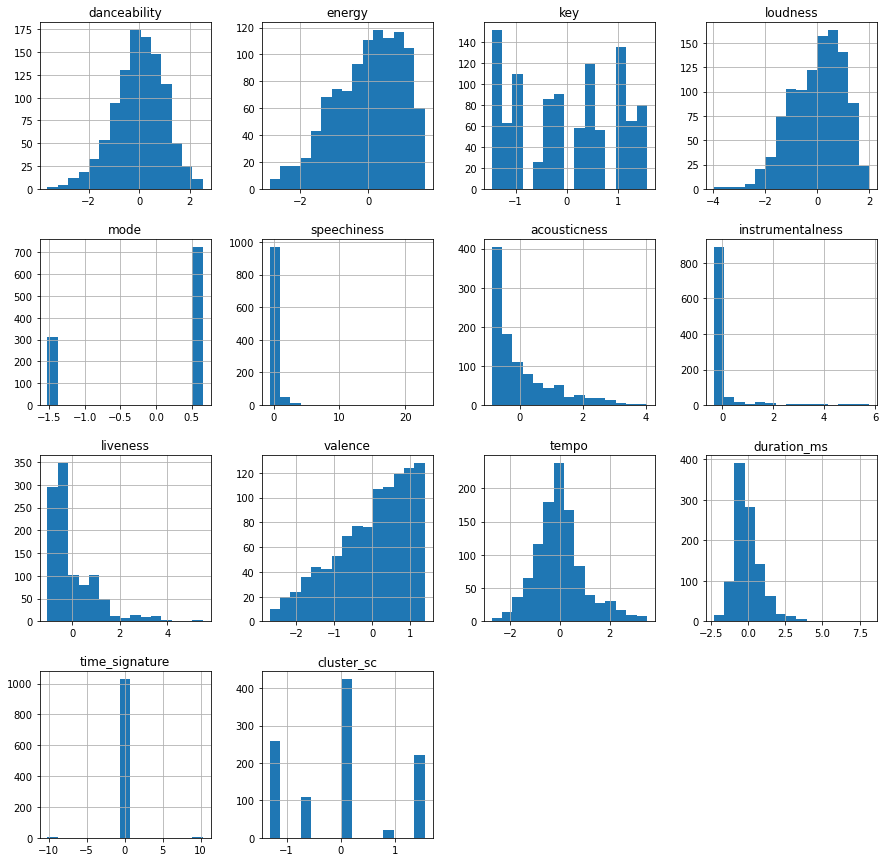

In [73]:
cluster_scaled_df.hist(bins=15,figsize=(15,15));

- Clustering scaled

In [74]:
K_Means=KMeans(n_clusters=5, random_state=5)
cluster_model_scaled=K_Means.fit(cluster_scaled_df)
cluster_model_scaled.cluster_centers_

array([[ 8.11122788e-01, -5.73324115e-01,  2.59328129e-01,
        -7.17664588e-01, -3.00721208e-01,  1.35088825e-01,
        -8.27722916e-02, -2.07125963e-01, -3.61137165e-01,
         5.01591458e-01, -2.40690191e-01, -7.37403480e-03,
         1.37501131e-01, -1.07730196e-02],
       [-6.93331285e-01, -1.32709095e+00,  5.46266151e-02,
        -6.71580784e-01,  1.61747913e-01, -3.30317262e-01,
         1.33582047e+00, -2.26087346e-01, -1.88940490e-01,
        -1.42181681e+00, -4.80488308e-01,  2.34811135e-01,
        -2.61947689e-01, -2.46558364e-01],
       [-1.57266211e-01,  6.61196479e-01, -1.54509149e-01,
         5.50788887e-01,  2.18052738e-01,  2.11688526e-02,
        -2.56230331e-01, -2.32702464e-01,  2.12173705e-01,
         2.94129654e-01,  3.34968027e-01, -6.57597878e-01,
        -2.11954076e-03,  7.71611245e-01],
       [ 2.79654973e-01,  4.47534330e-01, -6.21868944e-02,
         1.49825107e-01,  2.19358714e-01,  2.39961310e-01,
        -4.31604949e-01,  3.99335304e+00,  2.

In [75]:
cluster_model_scaled.labels_

array([4, 4, 0, ..., 2, 2, 0])

In [76]:
cluster_scaled_df['cluster_sc']=cluster_model_scaled.labels_

In [77]:
cluster_scaled_df['cluster_sc'].value_counts()

2    334
0    260
4    235
1    159
3     50
Name: cluster_sc, dtype: int64

In [78]:
cluster_scaled_df

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,cluster_sc
0,0.395831,-0.297509,1.017337,0.605651,0.655555,-0.221953,-0.834653,-0.334804,-0.530878,0.278412,0.392469,1.033764,0.058994,4
1,0.778086,0.824874,-1.473872,0.703657,0.655555,0.679293,-0.825190,0.064018,-0.854350,0.537597,-0.035430,0.138089,0.058994,4
2,0.230936,-0.319409,-0.920270,-1.024184,0.655555,-0.524959,-0.466644,-0.076602,-0.453541,-0.086203,-0.454776,0.068207,0.058994,0
3,0.433307,-0.806687,-0.366668,-0.370511,0.655555,-0.377341,0.239934,-0.292329,-0.386291,0.423380,-0.304937,-0.584953,0.058994,0
4,-0.458623,0.326646,-0.366668,0.386862,0.655555,-0.506830,-0.553914,-0.335383,-0.480441,-0.288279,-1.099174,0.131923,0.058994,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1033,-1.335562,1.449028,1.017337,0.102435,0.655555,0.189823,-0.827293,-0.218536,-0.204717,-0.345388,0.320036,-1.990136,0.058994,2
1034,-0.541070,0.080269,1.570939,-0.158914,0.655555,-0.113182,-0.577572,-0.335500,-0.520118,0.792388,0.201547,-1.292906,0.058994,2
1035,-0.818393,0.551122,-0.366668,-0.069600,0.655555,-0.338494,-0.865460,-0.335411,0.622456,-0.086203,0.855805,-0.279389,0.058994,2
1036,-0.136329,1.262877,1.017337,0.644614,-1.525426,0.355569,-0.631722,0.223036,-0.594766,0.291591,0.154733,-1.094683,0.058994,2


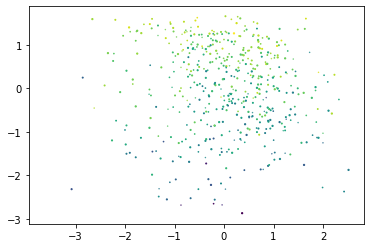

In [79]:
plt.scatter(cluster_scaled_df.iloc[:,0], cluster_scaled_df.iloc[:,1], cluster_scaled_df.iloc[:,2], cluster_scaled_df.iloc[:,3]);

- inertia

In [80]:
cluster_scaled_df=cluster_scaled_df.drop('cluster_sc',axis=1)

In [81]:
K=range(5,18)
inertia=[]
for k in K:
    kmeans=KMeans(n_clusters=k,random_state=5)
    kmeans.fit(cluster_scaled_df)
    inertia.append(kmeans.inertia_)

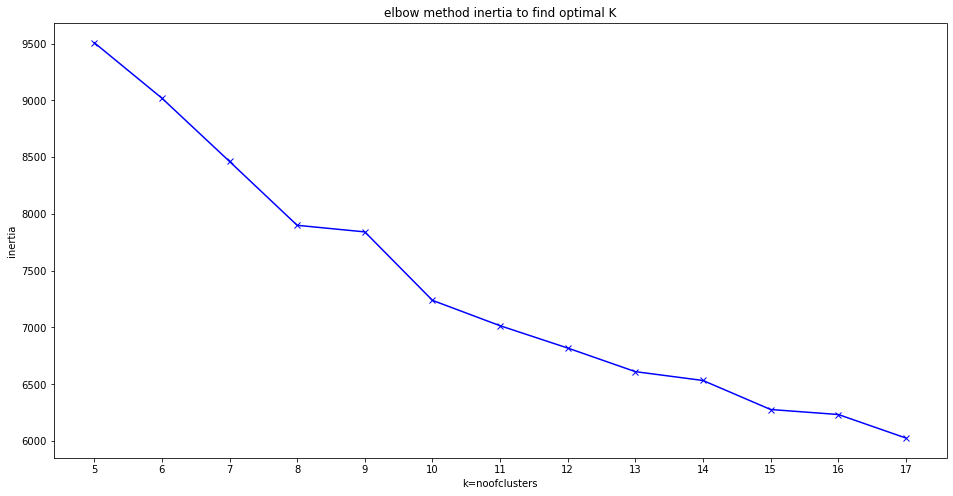

In [82]:
#plot the resulting inertia - elbow 
plt.figure(figsize=(16,8))
plt.plot(K,inertia,'bx-')
plt.xlabel('k=noofclusters')
plt.ylabel('inertia')
plt.xticks(np.arange(min(K),max(K)+1,1.0))
plt.title('elbow method inertia to find optimal K');

- silhouette

In [83]:
K=range(5,18)
sil=[]
for k in K:
    kmeans=KMeans(n_clusters=k,random_state=5)
    kmeans.fit(cluster_scaled_df)
    sil.append(silhouette_score(cluster_scaled_df,kmeans.predict(cluster_scaled_df)))

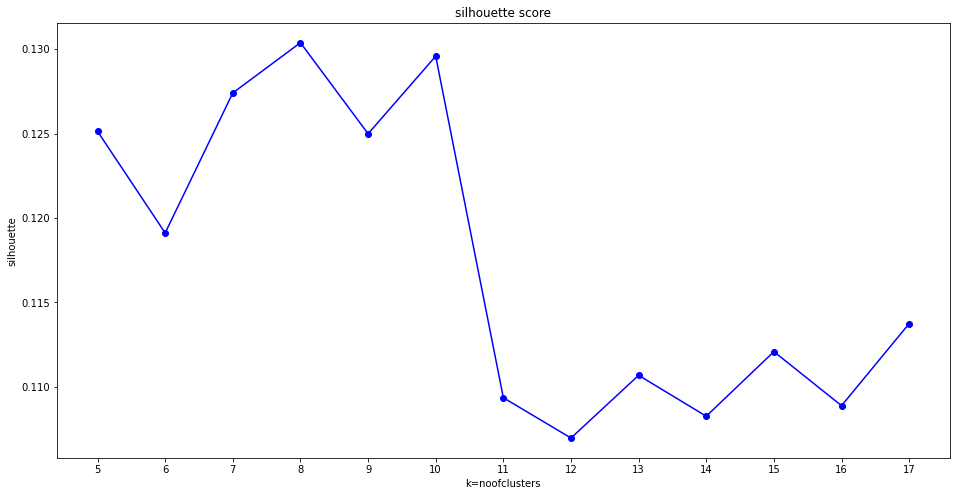

In [84]:
plt.figure(figsize=(16,8))
plt.plot(K,sil,'bo-')
plt.xlabel('k=noofclusters')
plt.ylabel('silhouette')
plt.xticks(np.arange(min(K),max(K)+1,1.0))
plt.title('silhouette score');

- CLUSTER FINAL

In [85]:
# We choose the K = 10 to redo the cluster

In [86]:
kmeans=KMeans(n_clusters=9, random_state=5)
ClMo=kmeans.fit(cluster_scaled_df)
cluster_scaled_df['cluster_final']=ClMo.labels_
cluster_scaled_df['cluster_final'].value_counts()

7    253
1    189
3    165
4    109
2    106
8     95
6     65
0     47
5      9
Name: cluster_final, dtype: int64

In [87]:
cluster_scaled_df

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,cluster_final
0,0.395831,-0.297509,1.017337,0.605651,0.655555,-0.221953,-0.834653,-0.334804,-0.530878,0.278412,0.392469,1.033764,0.058994,7
1,0.778086,0.824874,-1.473872,0.703657,0.655555,0.679293,-0.825190,0.064018,-0.854350,0.537597,-0.035430,0.138089,0.058994,7
2,0.230936,-0.319409,-0.920270,-1.024184,0.655555,-0.524959,-0.466644,-0.076602,-0.453541,-0.086203,-0.454776,0.068207,0.058994,3
3,0.433307,-0.806687,-0.366668,-0.370511,0.655555,-0.377341,0.239934,-0.292329,-0.386291,0.423380,-0.304937,-0.584953,0.058994,3
4,-0.458623,0.326646,-0.366668,0.386862,0.655555,-0.506830,-0.553914,-0.335383,-0.480441,-0.288279,-1.099174,0.131923,0.058994,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1033,-1.335562,1.449028,1.017337,0.102435,0.655555,0.189823,-0.827293,-0.218536,-0.204717,-0.345388,0.320036,-1.990136,0.058994,2
1034,-0.541070,0.080269,1.570939,-0.158914,0.655555,-0.113182,-0.577572,-0.335500,-0.520118,0.792388,0.201547,-1.292906,0.058994,7
1035,-0.818393,0.551122,-0.366668,-0.069600,0.655555,-0.338494,-0.865460,-0.335411,0.622456,-0.086203,0.855805,-0.279389,0.058994,2
1036,-0.136329,1.262877,1.017337,0.644614,-1.525426,0.355569,-0.631722,0.223036,-0.594766,0.291591,0.154733,-1.094683,0.058994,1


- Send the Spotify audio features of the submitted song to the clustering model, which should return a cluster number.

In [88]:
playlist_features

,title,artist,song_id,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,uri,track_href,analysis_url,duration_ms,time_signature
0,Original Sin,INXS,7pSzRRMaPXA39wvrnvdmSH,0.685,0.633,9,-7.259,1,0.0377,0.01360,0.000106,0.0935,0.731,131.397,audio_features,spotify:track:7pSzRRMaPXA39wvrnvdmSH,https://api.spotify.com/v1/tracks/7pSzRRMaPXA3...,https://api.spotify.com/v1/audio-analysis/7pSz...,317240,4
1,Sussudio,Phil Collins,07zkNvtcmPOFlMOXbma13k,0.736,0.838,0,-6.932,1,0.0725,0.01540,0.060800,0.0454,0.790,121.242,audio_features,spotify:track:07zkNvtcmPOFlMOXbma13k,https://api.spotify.com/v1/tracks/07zkNvtcmPOF...,https://api.spotify.com/v1/audio-analysis/07zk...,264947,4
2,Don't You (Forget About Me),Simple Minds,603aPXFY2Ec2WuFganUGuD,0.663,0.629,2,-12.697,1,0.0260,0.08360,0.039400,0.1050,0.648,111.290,audio_features,spotify:track:603aPXFY2Ec2WuFganUGuD,https://api.spotify.com/v1/tracks/603aPXFY2Ec2...,https://api.spotify.com/v1/audio-analysis/603a...,260867,4
3,Everywhere,Fleetwood Mac,6i8ecOsx4J2Px1maiqzqoG,0.690,0.540,4,-10.516,1,0.0317,0.21800,0.006570,0.1150,0.764,114.846,audio_features,spotify:track:6i8ecOsx4J2Px1maiqzqoG,https://api.spotify.com/v1/tracks/6i8ecOsx4J2P...,https://api.spotify.com/v1/audio-analysis/6i8e...,222733,4
4,High & Dry,ABC,7oWqXVRExRlNR0jZJNoO9w,0.571,0.747,4,-7.989,1,0.0267,0.06700,0.000018,0.1010,0.602,95.997,audio_features,spotify:track:7oWqXVRExRlNR0jZJNoO9w,https://api.spotify.com/v1/tracks/7oWqXVRExRlN...,https://api.spotify.com/v1/audio-analysis/7oWq...,264587,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1033,If I Should Fall From Grace With God,The Pogues,2QlYQQ8JpZf8mAk7PWcXsB,0.454,0.952,9,-8.938,1,0.0536,0.01500,0.017800,0.1420,0.589,129.678,audio_features,spotify:track:2QlYQQ8JpZf8mAk7PWcXsB,https://api.spotify.com/v1/tracks/2QlYQQ8JpZf8...,https://api.spotify.com/v1/audio-analysis/2QlY...,140693,4
1034,The Devil's Right Hand,Steve Earle,59JOneFVktVPSm0agaQWDo,0.560,0.702,11,-9.810,1,0.0419,0.06250,0.000000,0.0951,0.848,126.866,audio_features,spotify:track:59JOneFVktVPSm0agaQWDo,https://api.spotify.com/v1/tracks/59JOneFVktVP...,https://api.spotify.com/v1/audio-analysis/59JO...,181400,4
1035,Europe After the Rain,John Foxx,7p1wyDdcnJuwQDodZh1Duq,0.523,0.788,4,-9.512,1,0.0332,0.00774,0.000014,0.2650,0.648,142.393,audio_features,spotify:track:7p1wyDdcnJuwQDodZh1Duq,https://api.spotify.com/v1/tracks/7p1wyDdcnJuw...,https://api.spotify.com/v1/audio-analysis/7p1w...,240573,4
1036,That's What You Always Say,The Dream Syndicate,7jgfLVXTBxufrbccakHQi1,0.614,0.918,9,-7.129,0,0.0600,0.05220,0.085000,0.0840,0.734,125.755,audio_features,spotify:track:7jgfLVXTBxufrbccakHQi1,https://api.spotify.com/v1/tracks/7jgfLVXTBxuf...,https://api.spotify.com/v1/audio-analysis/7jgf...,192973,4


In [89]:
playlist_names=playlist_features[['title','artist','song_id']]
cluster_final=cluster_scaled_df['cluster_final']
playlist_cluster=playlist_names.join(cluster_final)
playlist_cluster

,title,artist,song_id,cluster_final
0,Original Sin,INXS,7pSzRRMaPXA39wvrnvdmSH,7
1,Sussudio,Phil Collins,07zkNvtcmPOFlMOXbma13k,7
2,Don't You (Forget About Me),Simple Minds,603aPXFY2Ec2WuFganUGuD,3
3,Everywhere,Fleetwood Mac,6i8ecOsx4J2Px1maiqzqoG,3
4,High & Dry,ABC,7oWqXVRExRlNR0jZJNoO9w,7
...,...,...,...,...
1033,If I Should Fall From Grace With God,The Pogues,2QlYQQ8JpZf8mAk7PWcXsB,2
1034,The Devil's Right Hand,Steve Earle,59JOneFVktVPSm0agaQWDo,7
1035,Europe After the Rain,John Foxx,7p1wyDdcnJuwQDodZh1Duq,2
1036,That's What You Always Say,The Dream Syndicate,7jgfLVXTBxufrbccakHQi1,1


In [90]:
playlist_cluster

,title,artist,song_id,cluster_final
0,Original Sin,INXS,7pSzRRMaPXA39wvrnvdmSH,7
1,Sussudio,Phil Collins,07zkNvtcmPOFlMOXbma13k,7
2,Don't You (Forget About Me),Simple Minds,603aPXFY2Ec2WuFganUGuD,3
3,Everywhere,Fleetwood Mac,6i8ecOsx4J2Px1maiqzqoG,3
4,High & Dry,ABC,7oWqXVRExRlNR0jZJNoO9w,7
...,...,...,...,...
1033,If I Should Fall From Grace With God,The Pogues,2QlYQQ8JpZf8mAk7PWcXsB,2
1034,The Devil's Right Hand,Steve Earle,59JOneFVktVPSm0agaQWDo,7
1035,Europe After the Rain,John Foxx,7p1wyDdcnJuwQDodZh1Duq,2
1036,That's What You Always Say,The Dream Syndicate,7jgfLVXTBxufrbccakHQi1,1


In [161]:
def song_displayer(x):
    song_search=sp.search(q=lower_song, limit=1, market=None)
    song_search['tracks']['items'][0]['id']

    display(IFrame(src=f"https://open.spotify.com/embed/track/{song_search['tracks']['items'][0]['id']}",
                            width="320",
                            height="80",
                            frameborder="0",
                            allowtransparency="true",
                            allow="encrypted-media",))

In [175]:
from IPython.display import display
from IPython.display import IFrame

lower_song= input('what song do you like?\n\n ').lower()

df = songs.applymap(lambda s:s.lower() if type(s) == str else s)
playlist_cluster_lower = playlist_cluster.applymap(lambda s:s.lower() if type(s) == str else s)

match_df = df[df['Song_title'].str.contains(lower_song)]
match = playlist_cluster_lower[playlist_cluster_lower['title'].str.contains(lower_song)]

if lower_song in df['Song_title'].values or lower_song in playlist_cluster_lower['title'].values:
    if len(match_df) > 0:
        question=input(f'\nIs this the song that you where looking for: {match_df.Song_title}{match_df.Artists} ? (y/n): ') 
        if question == 'y':
            print('\nCongrats! This is a hot song from the Billboard Top 100.')
            display(match_df[['Song_title','Artists']])
            print('Also we suggest you another random song:')
            random_song=songs[['Song_title', 'Artists']].sample(1)
            display(random_song)       
        elif question == 'n':
            print('''\n'Sorry! This song is not in the the Billboard Top 100 \n''')
        else:
            print('\nSorry! just write y or n' )
    elif len(match == 0):
        question2=input(f'\nIs this the song that you where looking for: {match.title}{match.artist} ? (y/n): ')
        if question2 == 'y':
            print("\nCongrats! This is a hot song from our database from Spotify list\n")
            song_displayer(match)
        elif question2 == 'n':
            print('\nWe can not find the song, but we suggest you some similar songs based in the same audiofeatures:')
            num_cluster=match['cluster_final']
            same_cluster_songs=playlist_cluster_lower[playlist_cluster_lower.cluster_final==int(num_cluster)].sample(5)
            display(same_cluster_songs[['title', 'artist']])
        else:
            print('\nSorry! just write y or n' )
else:
    print('The song does not match, try again')

what song do you like?

 sussudio

Is this the song that you where looking for: 1    sussudio
Name: title, dtype: object1    phil collins
Name: artist, dtype: object ? (y/n): y

Congrats! This is a hot song from our database from Spotify list

